In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
%matplotlib.inline


UsageError: Line magic function `%matplotlib.inline` not found.


In [ ]:
def load_housing_data(housing_path = HOUSING_PATH):
    

In [4]:
dataframe = pd.read_csv("housing.csv")

In [5]:
dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
#some basic info of the dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
#some stats of the dataframe
dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
dataframe["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

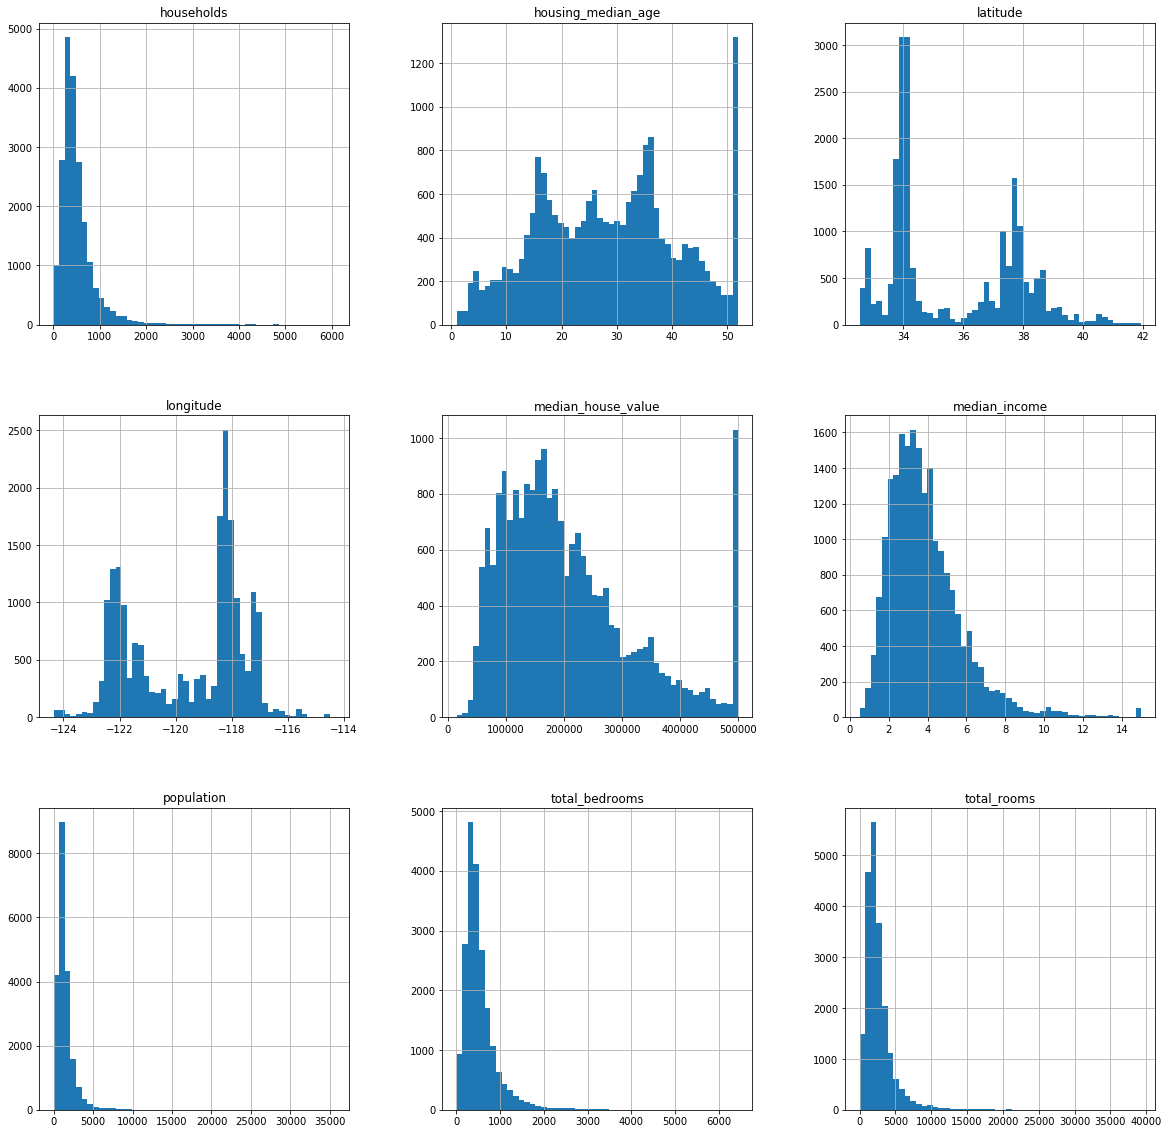

In [9]:
dataframe.hist(bins = 50, figsize = (20,20))
plt.show()

In [10]:
#add the index column
dataframe = dataframe.reset_index()

In [11]:
#will split the test and train set 
#test_size is the ratio to seperate
#random_state = 42 will shuffle the sets but remain the same shuffleeverytime

train_set, test_set = train_test_split(dataframe, test_size = 0.2, random_state=42)

In [12]:
#if there is update on the dataset
#use hash to make sure that no training data will go into the test set
#eg:put the 20% of the max as the threshold

In [13]:
#gives the smallest int that's larger than that
dataframe["income_cat"] = np.ceil(dataframe["median_income"] / 1.5)

In [14]:
dataframe["income_cat"]

0        6.0
1        6.0
2        5.0
3        4.0
4        3.0
5        3.0
6        3.0
7        3.0
8        2.0
9        3.0
10       3.0
11       3.0
12       3.0
13       2.0
14       2.0
15       2.0
16       2.0
17       2.0
18       2.0
19       2.0
20       1.0
21       2.0
22       2.0
23       2.0
24       2.0
25       2.0
26       2.0
27       2.0
28       2.0
29       2.0
        ... 
20610    1.0
20611    1.0
20612    1.0
20613    1.0
20614    2.0
20615    2.0
20616    2.0
20617    3.0
20618    2.0
20619    2.0
20620    4.0
20621    2.0
20622    2.0
20623    2.0
20624    3.0
20625    3.0
20626    2.0
20627    2.0
20628    2.0
20629    2.0
20630    3.0
20631    3.0
20632    3.0
20633    2.0
20634    3.0
20635    2.0
20636    2.0
20637    2.0
20638    2.0
20639    2.0
Name: income_cat, Length: 20640, dtype: float64

In [15]:
#replace values larger than 5.0 with 5.0 and keep those that are smaller the same
dataframe["income_cat"].where(dataframe["income_cat"] < 5, 10, inplace = True)

In [16]:
dataframe["income_cat"]

0        10.0
1        10.0
2        10.0
3         4.0
4         3.0
5         3.0
6         3.0
7         3.0
8         2.0
9         3.0
10        3.0
11        3.0
12        3.0
13        2.0
14        2.0
15        2.0
16        2.0
17        2.0
18        2.0
19        2.0
20        1.0
21        2.0
22        2.0
23        2.0
24        2.0
25        2.0
26        2.0
27        2.0
28        2.0
29        2.0
         ... 
20610     1.0
20611     1.0
20612     1.0
20613     1.0
20614     2.0
20615     2.0
20616     2.0
20617     3.0
20618     2.0
20619     2.0
20620     4.0
20621     2.0
20622     2.0
20623     2.0
20624     3.0
20625     3.0
20626     2.0
20627     2.0
20628     2.0
20629     2.0
20630     3.0
20631     3.0
20632     3.0
20633     2.0
20634     3.0
20635     2.0
20636     2.0
20637     2.0
20638     2.0
20639     2.0
Name: income_cat, Length: 20640, dtype: float64

In [17]:
#stratify the data so that the data represents each category based on income
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_ind, test_ind in split.split(dataframe, dataframe["income_cat"]):
    strat_train_set = dataframe.loc[train_ind]
    strat_test_set = dataframe.loc[test_ind]
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0     0.350533
2.0     0.318798
4.0     0.176357
10.0    0.114583
1.0     0.039729
Name: income_cat, dtype: float64

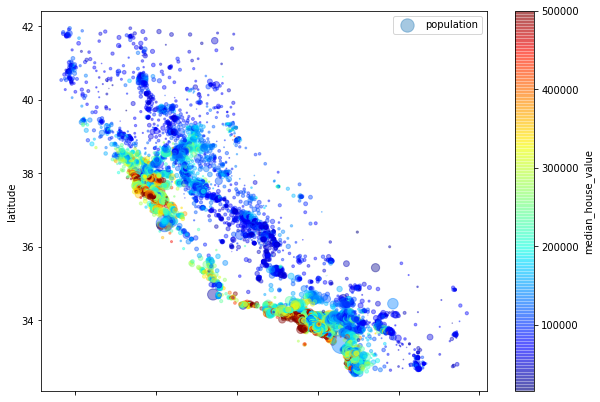

In [18]:
#an example of plot
#s: radius of each circle represents population
#c: color represents price
#cmap: a pre-defined color map
dataframe.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, s = dataframe["population"]/100,
               label = "population", figsize = (10,7), c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)

In [19]:
#check the correlation
corr_mat = dataframe.corr()
corr_mat["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.628880
total_rooms           0.134153
housing_median_age    0.105623
index                 0.072086
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [20]:
#create more attributes that make more sense
dataframe["room_per_household"] = dataframe["total_rooms"]/dataframe["households"]

In [21]:
#using the stratified training to create the training data
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()
housing.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2.0
18632,18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,10.0
14650,14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2.0
3230,3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2.0
3555,3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3.0


In [22]:
#drop the text attribute and use the imputer to deal with NA
#replace the NA value with the median value
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = "median")

In [23]:
housing_num = housing.drop("ocean_proximity", axis = 1)

In [24]:
#can use fit_transform directly
imputer.fit(housing_num)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [25]:
imputer.statistics_

array([ 1.0341e+04, -1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1195e+03,
        4.3300e+02,  1.1640e+03,  4.0800e+02,  3.5409e+00,  3.0000e+00])

In [26]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns)

In [27]:
housing.head()
# housing.iloc[:, 3:4]

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2.0
18632,18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,10.0
14650,14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2.0
3230,3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2.0
3555,3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3.0


In [28]:
#try define own class
from sklearn.base import BaseEstimator, TransformerMixin
class AddBedroomPerRoom(BaseEstimator, TransformerMixin):
    def __init__(self, add = True):
        self.add_bed = add
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        if self.add_bed == True:
            print(type(X))
            bed_per_room = X[:, 5] / X[:,4]
            return np.c_[X, bed_per_room]

In [29]:
# housing_num == housing_tr

In [30]:
a =housing_num["total_bedrooms"].isna().sum()

In [31]:
a

158

In [32]:
#use the pipeline to do the continuous steps
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([("imputer", Imputer(strategy = "median")), ("add_bed", AddBedroomPerRoom()), ("std_scaler", StandardScaler())])

In [33]:
a = list(housing_num.columns)
a.append("bed_per_room")

housing_num_tr = pd.DataFrame(num_pipeline.fit_transform(housing_num), columns = a)

<class 'numpy.ndarray'>


In [34]:
b = housing_num_tr["total_bedrooms"].isna().sum()
# housing_num_tr.head()

In [35]:
housing_num_tr.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,bed_per_room
0,1.216473,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.648478,0.155318
1,1.388065,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,2.637971,-0.836289
2,0.722100,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.648478,0.422200
3,-1.187825,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.648478,-0.196453
4,-1.133471,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.237671,0.269928


In [36]:
housing_prepared = pd.DataFrame(num_pipeline.fit_transform(housing_num), columns = a)

<class 'numpy.ndarray'>


In [37]:
housing_labels.head()

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

### use the stratified data to do the training and testing

In [39]:
housing_prepared.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,bed_per_room
0,1.216473,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.648478,0.155318
1,1.388065,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,2.637971,-0.836289
2,0.722100,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.648478,0.422200
3,-1.187825,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.648478,-0.196453
4,-1.133471,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.237671,0.269928


In [40]:
housing_prepared.drop("index", axis = 1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,bed_per_room
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.648478,0.155318
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,2.637971,-0.836289
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.648478,0.422200
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.648478,-0.196453
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.237671,0.269928
5,-0.696456,0.945009,-0.370047,0.143693,0.131447,0.025285,0.194138,-0.176435,-0.237671,-0.199264
6,0.537433,-0.748168,1.856709,-0.182253,-0.528198,-0.583328,-0.585720,2.366702,2.637971,-1.097923
7,1.166867,-0.696718,-0.210993,-0.272040,-0.586617,-0.433639,-0.324880,1.115239,0.173135,-1.073504
8,0.657325,-0.771554,1.459074,-0.354345,-0.167949,0.444770,-0.157197,-1.076906,-0.648478,0.545225
9,0.647334,-0.757522,0.027588,-0.985660,-0.742400,1.138535,-0.745417,-1.772116,-1.059284,3.534531


### Train the model using the start training set
##### housing_preped
##### housing_labels


In [44]:
#linear regression
from sklearn.linear_model import LinearRegression

In [59]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
from sklearn.metrics import mean_squared_error
housing_pred = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_pred)
print(lin_mse)

4752691725.797584


In [63]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [65]:
housing_pred = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_pred)
print(tree_mse)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0
0.0


### Cross-Validation

In [66]:
from sklearn.model_selection import cross_val_score

In [68]:
#10 folds
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
print(scores)

[-4.78611808e+09 -5.00838842e+09 -5.46679441e+09 -4.97451826e+09
 -6.07097992e+09 -5.30084867e+09 -4.89488092e+09 -5.67821314e+09
 -5.27686246e+09 -5.30938504e+09]


### Fine-Tune the model